<a href="https://colab.research.google.com/github/ogut77/estat.me/blob/main/Chapter6_3_4_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Load the dataset
url = 'https://raw.githubusercontent.com/ogut77/DataScience/refs/heads/main/PurchaseByCredit40.csv'
card = pd.read_csv(url)

# Prepare the data
X = card.drop('Purchase', axis=1)
y = card['Purchase']
#X = pd.get_dummies(X, drop_first=True)
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Create and train the Naive Bayes model
nbfit = GaussianNB()
nbfit.fit(X, y)

# Now you can use nbfit to make predictions:
# predictions = nbfit.predict(X_test)

nbfit


GaussianNB()

In [3]:
X

,id,Gender,Age,Income,Credit
0,1,1,0,1,1
1,2,0,1,0,2
2,3,0,0,0,1
3,4,0,0,0,1
4,5,0,0,1,0
5,6,0,1,0,1
6,7,0,1,0,2
7,8,1,0,1,1
8,9,0,0,0,2
9,10,1,1,0,1


In [4]:
# prompt: pred <- predict(nbfit, card, type = 'prob')
# pred in python

# Predict probabilities using the trained Naive Bayes model
pred = nbfit.predict_proba(X)

# Print or further process the predictions
pred


array([[0.84828263, 0.15171737],
       [0.16545941, 0.83454059],
       [0.86877169, 0.13122831],
       [0.86893468, 0.13106532],
       [0.99576268, 0.00423732],
       [0.45305897, 0.54694103],
       [0.16658356, 0.83341644],
       [0.84973975, 0.15026025],
       [0.61725121, 0.38274879],
       [0.2831043 , 0.7168957 ],
       [0.16797331, 0.83202669],
       [0.9236716 , 0.0763284 ],
       [0.28492091, 0.71507909],
       [0.41739315, 0.58260685],
       [0.16980815, 0.83019185],
       [0.46020741, 0.53979259],
       [0.99268741, 0.00731259],
       [0.98470712, 0.01529288],
       [0.08941323, 0.91058677],
       [0.85496654, 0.14503346],
       [0.85555067, 0.14444933],
       [0.17412572, 0.82587428],
       [0.87604521, 0.12395479],
       [0.87661948, 0.12338052],
       [0.99606019, 0.00393981],
       [0.47219023, 0.52780977],
       [0.1781103 , 0.8218897 ],
       [0.86023739, 0.13976261],
       [0.63794767, 0.36205233],
       [0.30223529, 0.69776471],
       [0.

In [5]:
# prompt: pred2 <- predict(nbfit, card)
#  pred2 in python

# Predict probabilities using the trained Naive Bayes model
pred2 = nbfit.predict(X)

# Print or further process the predictions
pred2


array(['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No'],
      dtype='<U3')

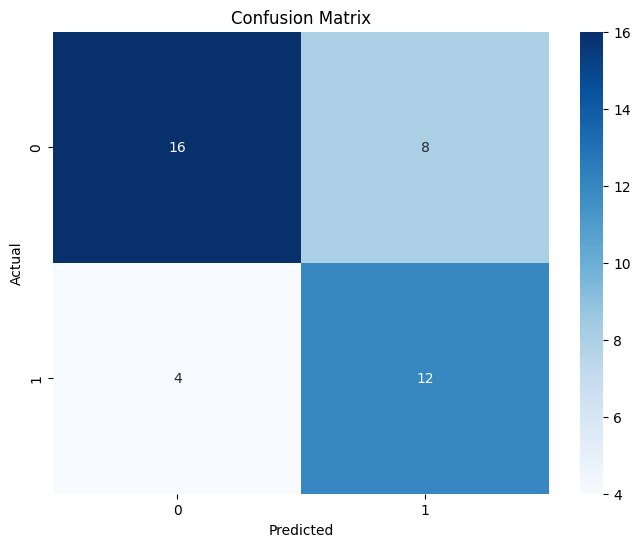

In [7]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library and alias it as 'plt'

# Assuming 'y' contains the true labels and 'pred2' contains the predicted labels
cm = confusion_matrix(y, pred2)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:

from sklearn.metrics import accuracy_score

# Assuming 'y' contains the true labels and 'pred2' contains the predicted labels
accuracy = accuracy_score(y, pred2)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7
